# SARSA(lambda)

In [1]:
# Find the value function of policy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# display output
import random
from random import uniform
import time
from IPython.display import display, clear_output

In [2]:
actions = [[-1, 0], [0, 1], [1, 0], [0, -1]] #up, right, down, left = (clockwise from up) 
action_count = len(actions) # total number of actions
gridSize = 5 # create a square grid of gridSize by gridSize
state_count = gridSize*gridSize # total number of states

In [3]:
class Gridworld():
    def __init__(self, gridSize):
        self.valueMap = np.zeros((gridSize, gridSize))
        self.states = [[i, j] for i in range(gridSize) for j in range(gridSize)]
        self.size = gridSize
        self.new_pos = [0, 0] # initialize new position for p_transition
        self.transition_prob = 1 # deterministic
    
    def initial_state(self):        # return initial state
        return grid.states[gridSize*gridSize-1]
   
    def transition_reward(self, current_pos, action): # return the transition probability

        # get next position: state: [0, 0], action: [0, 1], new_state = [0, 1]
        self.new_pos = np.array(current_pos) + np.array(action)

        # normally, reward = 0
        reward = 0

        # if new pos results in off the grid, return reward -1
        if -1 in self.new_pos or self.size in self.new_pos:
            reward = -1
        # if in state A, receive + 10
        if current_pos == [0, 1]:
            reward = 10
        # if in state B, receive + 5
        if current_pos == [0, 3]:
            reward = 5

        # if taking an action crosses the border; agent's new_pos is the same as the current pos
        if -1 in self.new_pos or self.size in self.new_pos: 
            self.new_pos = current_pos
            
        # if in state A, transition to state A'
        if current_pos == [0, 1]:
            self.new_pos = [4, 1]
            
        # if in state B, transition to state B'
        if current_pos == [0, 3]:
            self.new_pos = [2, 3]

        return self.new_pos, reward

In [4]:
# create a grid object
grid = Gridworld(5)

In [5]:
# get initial state (bottom right)
grid.initial_state()

[4, 4]

### SARSA(Lamda)

In [6]:
# intialize parameters
gamma = 0.99
epsilon = 0.1
lamda = 0.9
lr = 0.8

In [7]:
# iterate 500 times: each time, generating an episode of 200 steps
max_steps = 200

# define variables for keeping track of time steps
Terminal = max_steps
t_list=[]
for i in range(1,max_steps+1):
    t = Terminal - i
    t_list.append(t)

In [8]:
def choose_action(state, epsilon):
    
    # choose an action type: explore or exploit
    action_type = int(np.random.choice(2, 1, p=[epsilon,1-epsilon]))

    # find best action based on Q values
    best_action_index = np.argmax(Q_values[state])

    # pick a random action
    random_action_index = random.choice(range(4))

    # choose an action based on exploit or explore
    if action_type == 0:
        
        # while random action is the same as the best action, pick a new action
        while random_action_index == best_action_index:
            random_action_index = random.choice(range(4))
        
        # explore
        # print("explore")
        action_index = random_action_index
    else:
        # exploit
        # print("exploit")
        action_index = best_action_index
        
    return action_index

In [9]:
# initialize q values for all state action pairs
Q_values = np.zeros((state_count, action_count))

In [10]:
# define average function
def Average(lst): 
    return sum(lst) / len(lst) 

In [11]:
average_reward_list = []
cumulative_reward_list = []
cumulative_reward = 0
delta_list = []

# iteration 500 times
for iteration in range(500):
    
    # initialize delta for eligibility trace
    delta_ = 0
    
    # delta for change in Q values
    delta = 0
    
    # initialize S,A (? should i choose an Action using epsilon-greedy here or just select an Action?)
    state_vector = grid.initial_state()
    state_index = grid.states.index(state_vector)
    
    # initialize  eligibility traces for all state action pairs of all states to 0
    z_values = np.zeros((state_count, action_count))
    

    
    reward_list = []
    

    # iteration 200 steps of the episode
    for i in range(max_steps):
        # Take action A
        action_index = choose_action(state_index, epsilon)
        action_vector = actions[action_index]
        # observe R, S', A'
        next_state_vector, reward = grid.transition_reward(state_vector, action_vector)
        next_state_index = grid.states.index(list(next_state_vector))
        next_action_index = choose_action(next_state_index, epsilon)
        next_action_vector = actions[next_action_index]
        reward_list.append(reward)
        
        #Delta for the step - update the action-value form of the TD error 
        delta_ = reward + gamma*Q_values[next_state_index][next_action_index] - Q_values[state_index][action_index]
    
        # accumulate traces for the episode (? big S and big A?)
        z_values[state_index][action_index] +=1
        
        
        for s in range(len(grid.states)):
            for a in range(action_count):
                # calculate max Q_value change for plotting max delta
                Q_value = Q_values[state_index][action_index] + lr*delta_*z_values[state_index][action_index]
                delta = max(delta, np.abs(Q_value - Q_values[state_index][action_index]))  
               
                # update Q value
                Q_values[s][a] = Q_values[s][a] + lr*delta_*z_values[s][a]

                # update z value
                z_values[state_index][action_index] = gamma*lamda*z_values[state_index][action_index]
        
        # update state and action vector
        state_vector = list(next_state_vector)
        state_index = grid.states.index(state_vector)
        action_vector = list(next_action_vector)
        action_index = next_action_index
    
    # append delta
    delta_list.append(delta)
    
    # append average rewards
    average_reward_list.append(Average(reward_list))
    
    # append cumulative rewards
    cumulative_reward = cumulative_reward + sum(reward_list)
    cumulative_reward_list.append(cumulative_reward)

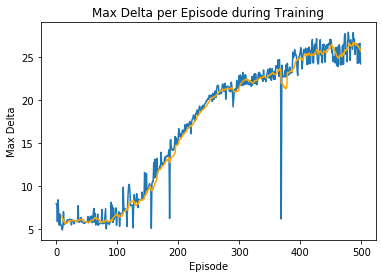

In [12]:
# max delta of each episode, where delta is the change in Q values
plt.plot(delta_list)
plt.title('Max Delta per Episode during Training')
plt.xlabel('Episode')
plt.ylabel('Max Delta')

# plot moving average
delta_frame = pd.DataFrame(delta_list)
rolling_mean = delta_frame.rolling(window=10).mean()
plt.plot(rolling_mean, label='Moving Average', color='orange')

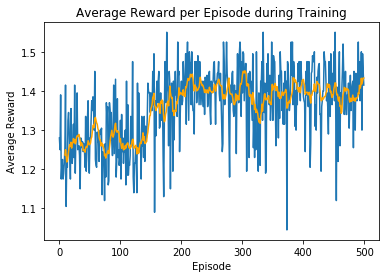

In [13]:
# average reward per episode
plt.plot(average_reward_list)
plt.title('Average Reward per Episode during Training')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

# plot moving average
reward_frame = pd.DataFrame(average_reward_list)
rolling_mean = reward_frame.rolling(window=10).mean()
plt.plot(rolling_mean, label='Moving Average', color='orange')

Text(0, 0.5, 'Cumulative Reward')

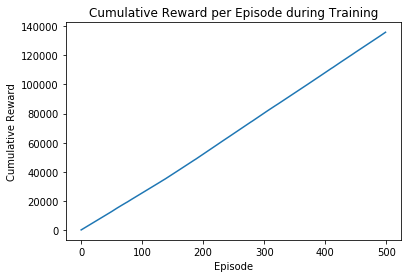

In [14]:
# cumulative reward per episode
plt.plot(cumulative_reward_list)
plt.title('Cumulative Reward per Episode during Training')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')

In [15]:
z_values

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.72233102e-06, 0.00000000e+00, 0.00000000e+00],
       [9.72242555e-06, 9.72242555e-06, 9.72242555e-06, 9.72242555e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.72242555e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.72233102e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.72242555e-06, 9.72242555e-06, 9.72242555e-06, 9.72233102e-06],
       [9.72242555e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.72242555e-06, 9.72242555e-06, 9.72233102e

In [16]:
np.set_printoptions(precision=2)
Q_values

array([[9.10e+00, 1.02e+01, 9.86e+00, 8.49e+00],
       [1.03e+01, 1.03e+01, 1.02e+01, 1.02e+01],
       [3.39e+01, 3.55e+01, 2.88e+01, 1.02e+01],
       [4.03e+01, 2.96e+01, 3.26e+01, 3.30e+01],
       [3.38e+01, 3.31e+01, 2.79e+01, 3.66e+01],
       [1.00e+01, 9.53e+00, 8.42e+00, 8.73e+00],
       [1.02e+01, 5.04e+00, 4.96e-01, 2.67e+00],
       [3.57e+01, 2.63e+01, 9.68e+00, 5.56e+00],
       [3.72e+01, 3.22e+01, 3.11e+01, 3.20e+01],
       [3.55e+01, 9.03e+00, 2.53e+00, 1.04e+01],
       [9.81e+00, 2.10e+00, 3.44e+00, 3.93e+00],
       [6.22e-01, 2.83e-01, 1.87e-02, 6.22e+00],
       [2.56e+01, 1.60e+00, 3.70e-02, 3.31e-01],
       [3.58e+01, 5.70e+00, 1.96e+00, 8.93e+00],
       [1.54e+01, 1.70e-01, 2.69e-02, 6.62e-01],
       [8.22e+00, 1.00e-01, 1.12e-01, 3.05e-01],
       [4.81e-01, 1.52e-02, 1.29e-02, 2.14e-02],
       [5.54e-01, 1.12e-02, 3.50e-03, 8.47e-03],
       [5.09e+00, 5.16e-02, 5.33e-02, 5.69e-02],
       [1.71e-01, 1.97e-04, 6.28e-03, 5.50e-03],
       [1.34e+00, 8.

## Visualization 

In [17]:
# PRINT POLICY TABLE ################################################################################
# define column and index
columns=range(grid.size)
index = range(grid.size)
# define dataframe to represent policy table
policy_table = pd.DataFrame(index = index, columns=columns)

# iterate through policy to make a table that represents action number
# as action name (eg. left, right, up, down)
for state in range(len(Q_values)):
    
    # find the best action at each state
    best_action = np.argmax(Q_values[state])

    # get action name
    if best_action == 0:
        action_name = 'up'
    elif best_action == 1:
        action_name = 'right'
    elif best_action == 2:
        action_name = 'down'
    else:
        action_name = 'left'

    # calculate the row and column coordinate of the current state number
    row = int(state/grid.size)
    column = round((state/grid.size - int(state/grid.size))*grid.size)
            
    # assign action name
    policy_table.loc[row][column] = action_name

print("Policy Table: ")
print(policy_table)
print()

Policy Table: 
       0     1      2   3     4
0  right    up  right  up  left
1     up    up     up  up    up
2     up  left     up  up    up
3     up    up     up  up    up
4     up  left     up  up  left



## Extract Policy 

In [18]:
# initialize q values for all state action pairs
policy = np.zeros((state_count, action_count))

In [19]:
for state in range(len(Q_values)):
    
    # find the best action at each state
    best_action = np.argmax(Q_values[state])
    
    policy[state][best_action] = 1

In [20]:
policy

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

## Testing 

In [21]:
def generate_episode(steps):

    # set initial state
    state_vector = grid.initial_state()

    # initialize state (with iniitial state), action list and reward list
    state_list = [state_vector]
    action_list = []
    reward_list = []

    # generate an episode
    for i in range(steps):

        # pick an action based on categorical distribution in policy
        action_index = int(np.random.choice(action_count, 1, p=policy[grid.states.index(state_vector)])) 
        action_vector = actions[action_index] # convert the integer index (ie. 0) to action (ie. [-1, 0])

        # get new state and reward after taking action from current state
        new_state_vector, reward = grid.transition_reward(state_vector, action_vector)
        state_vector = list(new_state_vector)

        # save state, action chosen and reward to list
        state_list.append(state_vector)
        action_list.append(action_vector)
        reward_list.append(reward)
        
    return state_list, action_list, reward_list

In [22]:
avg_test_reward_list = []

# using the trained policy, generate 20 episodes
for test in range(20):
    
    # generate an episode of specified step count
    state_list, action_list, reward_list = generate_episode(200)
    
    avg_test_reward_list.append(Average(reward_list))

Text(0, 0.5, 'Average Reward')

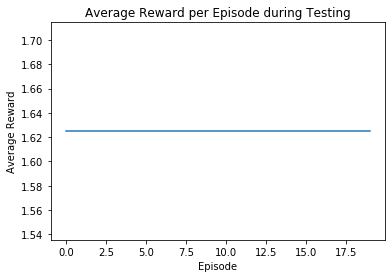

In [23]:
# average reward per episode
plt.plot(avg_test_reward_list)
plt.title('Average Reward per Episode during Testing')
plt.xlabel('Episode')
plt.ylabel('Average Reward')